In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
hr_data = pd.read_excel("HR_Employee_Data.xlsx")

## Data imported and start with plots

In [18]:
hr_data.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [30]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [31]:
hr_data.mean(numeric_only = True)

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [23]:
hr_data.plot(kind='scatter', x='average_montly_hours', y='last_evaluation', title='Salary vs Hours spent last month', color='green', figsize=(10,6))
plt.grid(True)
plt.tight_layout()
plt.show()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

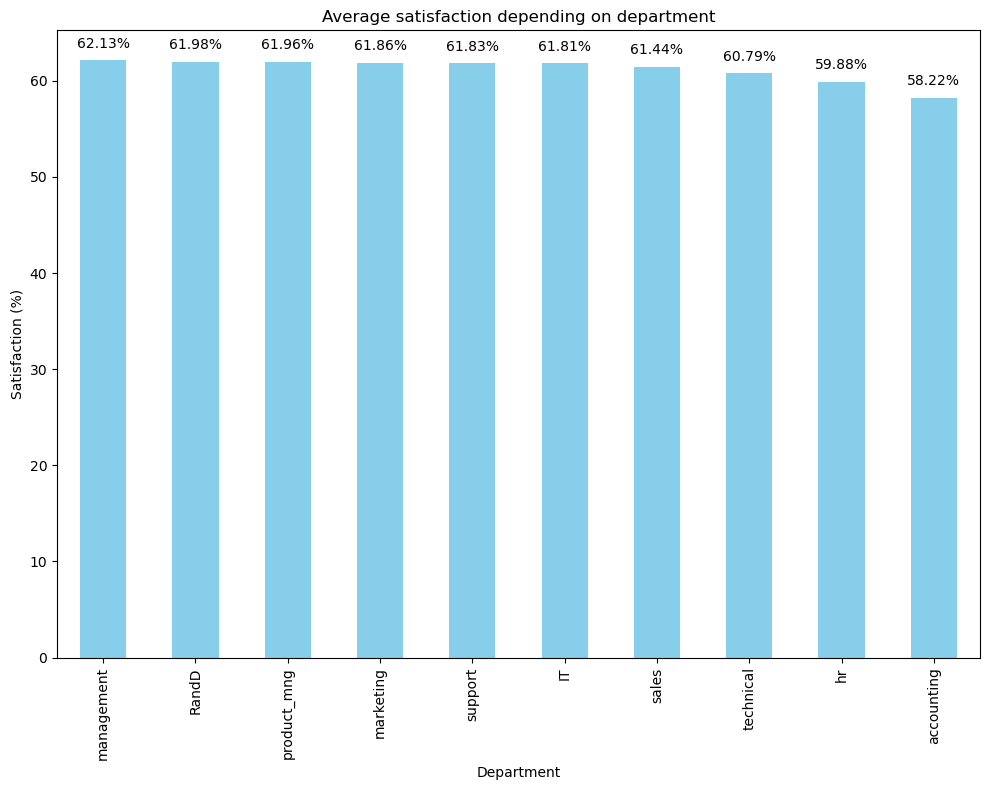

In [38]:
avg_satisfaction = hr_data.groupby("Department")["satisfaction_level"].mean() * 100
avg_satisfaction = avg_satisfaction.sort_values(ascending=False)

# Plot
ax = avg_satisfaction.plot(kind='bar', figsize=(10, 8), title='Average satisfaction depending on department', color='skyblue')
plt.ylabel('Satisfaction (%)')

for i, value in enumerate(avg_satisfaction):
    ax.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

if 'left' == True:
    hr_data.dropna(how = 'any', inplace = True)
    

plt.tight_layout()
plt.show()